## Universidad Autonoma de Nuevo León
## Facultad de Ciencias Físico Matemáticas
### Maestría en Ciencia de Datos
### Aprendizaje Automático
#### Eduardo David González Flores
##### 1515489

## Tarea (10 puntos)
- Investigar sobre algoritmos supervisados que puedan aplicarse a tu problema. Da un panorama sobre el modelo matemático que emplean y explica por qué conviene utilizarlo
- Investigar sobre métricas para analizar los errores de tus datos y discutirla (generalmente se usan MAE, MAPE, RMSE, MSE...)
- Aplicar al menos un algoritmo supervisado a tus datos para predecir alguna variable (puede ser interpolación o extrapolación)
- Actualiza literatura relacionada, metodología, resultados y discusión en tu artículo
- Sube el código de tu tarea, los archivos de Latex y el PDF del artículo en tu repositorio, claramente diferenciados

In [104]:
import pandas as pd

#file_path = '../data/churn.csv'
file_path = '../data/churn_dummy_clusters.csv'

df_og = pd.read_csv(file_path)
df_og

,customer_id,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,k
0,15634602,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,3
1,15647311,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,15619304,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,15701354,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,1
4,15737888,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,15606229,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,1
9996,15569892,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,3
9997,15584532,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,1
9998,15682355,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,2


In [105]:
df = df_og.drop(['customer_id'], axis=1)
df

,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn,country_Germany,country_Spain,gender_Male,k
0,619,42,2,0.00,1,1,1,101348.88,1,0,0,0,3
1,608,41,1,83807.86,1,0,1,112542.58,0,0,1,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,0,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,0,0,1
4,850,43,2,125510.82,1,1,1,79084.10,0,0,1,0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,771,39,5,0.00,2,1,0,96270.64,0,0,0,1,1
9996,516,35,10,57369.61,1,1,1,101699.77,0,0,0,1,3
9997,709,36,7,0.00,1,0,1,42085.58,1,0,0,0,1
9998,772,42,3,75075.31,2,1,0,92888.52,1,1,0,1,2


In [106]:
from pycaret.classification import *
s = setup(df, target='churn', session_id=123)
s

,Description,Value
0,Session id,123
1,Target,churn
2,Target type,Binary
3,Original data shape,"(10000, 13)"
4,Transformed data shape,"(10000, 13)"
5,Transformed train set shape,"(7000, 13)"
6,Transformed test set shape,"(3000, 13)"
7,Numeric features,12
8,Preprocess,True
9,Imputation type,simple


In [107]:
best = compare_models(sort='MCC', n_select=5, exclude=['lightgbm'])
best

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
catboost,CatBoost Classifier,0.8616,0.8571,0.4818,0.7516,0.5860,0.5077,0.5265,3.7690
gbc,Gradient Boosting Classifier,0.8621,0.8618,0.4650,0.7693,0.5787,0.5023,0.5255,0.1220
rf,Random Forest Classifier,0.8584,0.8430,0.4432,0.7638,0.5605,0.4831,0.5088,0.1270
ada,Ada Boost Classifier,0.8531,0.8429,0.4552,0.7238,0.5578,0.4753,0.4942,0.0490
xgboost,Extreme Gradient Boosting,0.8471,0.8283,0.4812,0.6759,0.5614,0.4721,0.4825,0.0730
et,Extra Trees Classifier,0.8501,0.8380,0.4208,0.7298,0.5333,0.4517,0.4763,0.0980
qda,Quadratic Discriminant Analysis,0.8246,0.8055,0.3878,0.6118,0.4743,0.3752,0.3895,0.0060
dt,Decision Tree Classifier,0.7863,0.6746,0.4860,0.4761,0.4806,0.3462,0.3465,0.0100
lda,Linear Discriminant Analysis,0.8106,0.7726,0.2504,0.5837,0.3490,0.2587,0.2911,0.0090
ridge,Ridge Classifier,0.8079,0.0000,0.1346,0.6354,0.2215,0.1620,0.2269,0.0080


 GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                            learning_rate=0.1, loss='log_loss', max_depth=3,
                            max_features=None, max_leaf_nodes=None,
                            min_impurity_decrease=0.0, min_samples_leaf=1,
                            min_samples_split=2, min_weight_fraction_leaf=0.0,
                            n_estimators=100, n_iter_no_change=None,
                            random_state=123, subsample=1.0, tol=0.0001,
                            validation_fraction=0.1, verbose=0,
                            warm_start=False),
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                        criterion='gini', max_depth=None, max_features='sqrt',
                        max_leaf_nodes=None, max_samples=None,
                        min_impurity_decrease=0.0, min_samples_leaf=1,
                        min_samples_split=2, min_weight_fraction_leaf=0.0,
      

In [108]:
best_model = best[0]
best_model

In [110]:
pull().to_csv('./05-compare_models.csv', index=False)

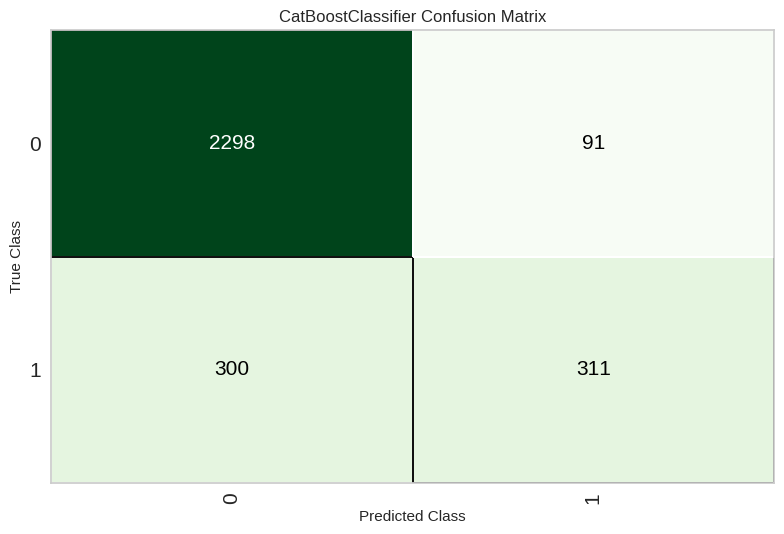

In [111]:
plot_model(best_model, plot='confusion_matrix')

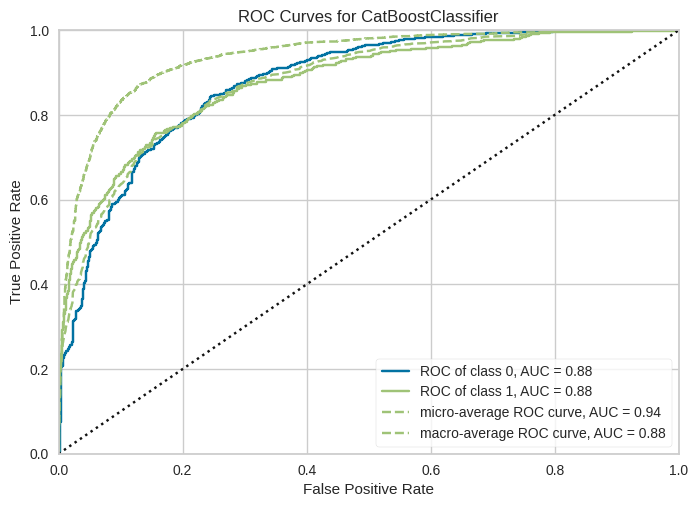

In [112]:
plot_model(best_model, plot='auc')

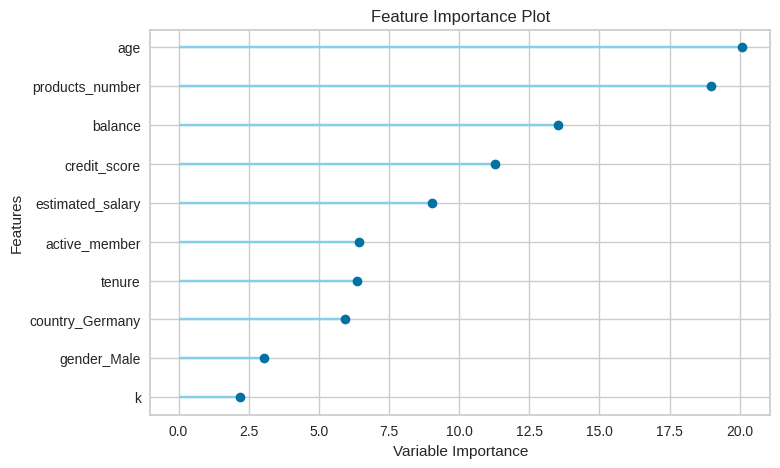

In [114]:
plot_model(best_model, plot='feature')

In [115]:
evaluate_model(best_model)


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [116]:
save_model(best_model, '05-01-best-default')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score', 'age', 'tenure',
                                              'balance', 'products_number',
                                              'credit_card', 'active_member',
                                              'estimated_salary',
                                              'country_Germany', 'country_Spain',
                                              'gender_Male', 'k'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                                               strategy='mean',
                          

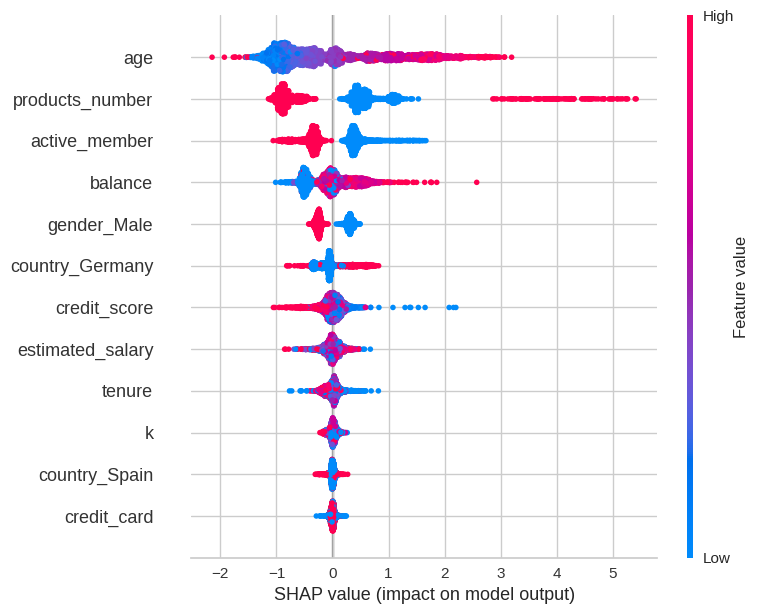

In [118]:
interpret_model(best_model)

# Optimization

In [119]:
best_tuned, best_tuner = tune_model(best_model, optimize='MCC', n_iter=100, fold=10, choose_better=True, return_tuner=True, early_stopping=True)
best_tuned

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8614,0.8735,0.4859,0.7419,0.5872,0.5083,0.5247
1,0.8771,0.8887,0.5070,0.8182,0.6261,0.5574,0.5802
2,0.8614,0.8622,0.5070,0.7273,0.5975,0.5170,0.5293
3,0.8700,0.8934,0.5352,0.7525,0.6255,0.5496,0.5612
4,0.8671,0.8824,0.5385,0.7404,0.6235,0.5453,0.5554
5,0.8686,0.8701,0.4755,0.8000,0.5965,0.5240,0.5493
6,0.8686,0.8419,0.4476,0.8312,0.5818,0.5120,0.5466
7,0.8371,0.8299,0.4406,0.6495,0.5250,0.4310,0.4429
8,0.8629,0.8337,0.4825,0.7582,0.5897,0.5122,0.5311


Fitting 10 folds for each of 100 candidates, totalling 1000 fits


In [121]:
save_model(best_tuned, '05-02-best-tuned')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score', 'age', 'tenure',
                                              'balance', 'products_number',
                                              'credit_card', 'active_member',
                                              'estimated_salary',
                                              'country_Germany', 'country_Spain',
                                              'gender_Male', 'k'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                                               strategy='mean',
                          

In [120]:
best_optimized = optimize_threshold(best_tuned, optimize='MCC')

optimization loop finished successfully. Best threshold: 0.421875 with MCC=0.5367


In [122]:
save_model(best_optimized, '05-03-best-optimized')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score', 'age', 'tenure',
                                              'balance', 'products_number',
                                              'credit_card', 'active_member',
                                              'estimated_salary',
                                              'country_Germany', 'country_Spain',
                                              'gender_Male', 'k'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                                               strategy='most_frequent',
                 

In [123]:
results = pd.DataFrame()

for i in range(1, 100):  # El rango va de 0 a 10 (11 no se incluye)
    threshold = i/100
    predict_model(best_optimized, raw_score=True, probability_threshold=threshold, verbose=False)
    aux = pull()
    aux['threshold'] = threshold
    results = pd.concat([results, aux], ignore_index=True)

results

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,threshold
0,CatBoost Classifier,0.2350,0.8787,1.0000,0.2103,0.3475,0.0164,0.0910,0.01
1,CatBoost Classifier,0.3377,0.8787,0.9951,0.2346,0.3796,0.0746,0.1934,0.02
2,CatBoost Classifier,0.4047,0.8787,0.9836,0.2528,0.4023,0.1157,0.2385,0.03
3,CatBoost Classifier,0.4590,0.8787,0.9705,0.2698,0.4222,0.1519,0.2718,0.04
4,CatBoost Classifier,0.5040,0.8787,0.9624,0.2864,0.4414,0.1859,0.3025,0.05
...,...,...,...,...,...,...,...,...,...
94,CatBoost Classifier,0.8173,0.8787,0.1031,1.0000,0.1869,0.1548,0.2896,0.95
95,CatBoost Classifier,0.8140,0.8787,0.0867,1.0000,0.1596,0.1314,0.2652,0.96
96,CatBoost Classifier,0.8093,0.8787,0.0638,1.0000,0.1200,0.0980,0.2269,0.97
97,CatBoost Classifier,0.8063,0.8787,0.0491,1.0000,0.0936,0.0760,0.1987,0.98


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,threshold
40,CatBoost Classifier,0.8687,0.8787,0.5794,0.721,0.6425,0.5632,0.5682,0.41


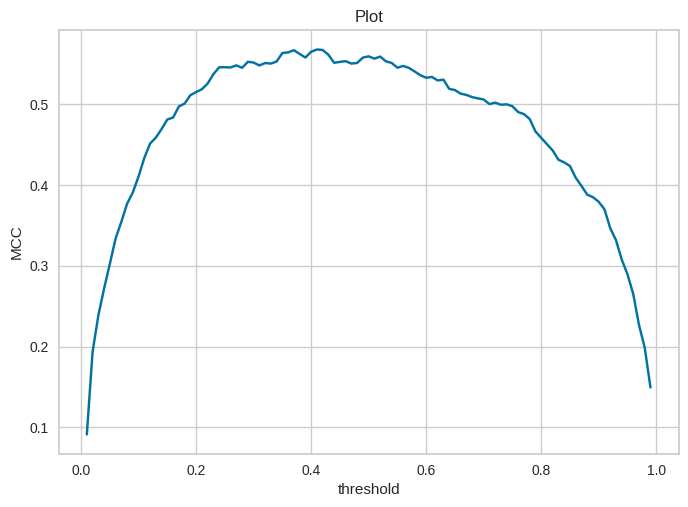

In [124]:
import matplotlib.pyplot as plt

best_results = results.loc[results['MCC'] == results['MCC'].max()]
display(best_results)

plt.plot(results['threshold'], results['MCC'])
plt.xlabel('threshold')
plt.ylabel('MCC')
plt.title('Plot')
plt.show()

In [125]:
predictions = predict_model(best_optimized, raw_score=True, probability_threshold=0.421875)
predictions

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,CatBoost Classifier,0.8683,0.8787,0.5696,0.7250,0.6379,0.5589,0.5650


,credit_score,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,country_Germany,country_Spain,gender_Male,k,churn,prediction_label,prediction_score_0,prediction_score_1
3564,847,51,5,97565.742188,1,0,0,144184.062500,0,0,1,0,1,1,0.4045,0.5955
1986,845,41,2,81733.742188,2,0,0,199761.296875,1,0,0,0,0,0,0.9385,0.0615
3684,482,35,2,133111.734375,1,0,1,79957.953125,0,0,0,2,0,0,0.9350,0.0650
3334,671,27,5,0.000000,2,0,0,120893.070312,0,0,1,3,0,0,0.9874,0.0126
8346,695,32,9,0.000000,3,0,1,38533.789062,0,1,1,1,0,0,0.8525,0.1475
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9164,680,36,7,0.000000,2,1,0,20109.210938,0,1,1,1,0,0,0.9817,0.0183
364,640,68,9,0.000000,2,1,1,199493.375000,0,0,1,3,0,0,0.9798,0.0202
3872,605,39,6,111169.906250,1,0,0,9641.400391,0,0,1,2,0,0,0.8532,0.1468
3311,513,72,3,98903.062500,1,1,1,81251.242188,0,1,1,2,0,0,0.9735,0.0265


In [126]:
best_final = finalize_model(best_optimized)
best_final

Pipeline(memory=Memory(location=None),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score', 'age', 'tenure',
                                             'balance', 'products_number',
                                             'credit_card', 'active_member',
                                             'estimated_salary',
                                             'country_Germany', 'country_Spain',
                                             'gender_Male', 'k'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,
                                                              keep_empty_...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 CustomProbabilityThresholdClassifier(border_count=254,
                                                      classifier=<catboost.core.CatBoostClassifier object at 0x7f32f72a0df0>,
                                                      depth=6, eta=0.05,
                                                      l2_leaf_reg=5,
                                                      n_estimators=300,
                                                      probability_threshold=0.421875,
                                                      random_state=123,
                                                      random_strength=0.7,
                                                      task_type='CPU',
                                                      verbose=False))],
         verbose=False)

In [127]:
save_model(best_final, '05-04-best-final')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(exclude=None,
                                     include=['credit_score', 'age', 'tenure',
                                              'balance', 'products_number',
                                              'credit_card', 'active_member',
                                              'estimated_salary',
                                              'country_Germany', 'country_Spain',
                                              'gender_Male', 'k'],
                                     transformer=SimpleImputer(add_indicator=False,
                                                               copy=True,
                                                               fill_value=None,
                                                               keep_empty_...
                                                               strategy='most_frequent',
                 

In [128]:
load_model('05-04-best-final')

Transformation Pipeline and Model Successfully Loaded


Pipeline(memory=FastMemory(location=/tmp/joblib),
         steps=[('numerical_imputer',
                 TransformerWrapper(exclude=None,
                                    include=['credit_score', 'age', 'tenure',
                                             'balance', 'products_number',
                                             'credit_card', 'active_member',
                                             'estimated_salary',
                                             'country_Germany', 'country_Spain',
                                             'gender_Male', 'k'],
                                    transformer=SimpleImputer(add_indicator=False,
                                                              copy=True,
                                                              fill_value=None,...
                                                              strategy='most_frequent',
                                                              verbose='deprecated'))),
                ('actual_estimator',
                 CustomProbabilityThresholdClassifier(border_count=254,
                                                      classifier=<catboost.core.CatBoostClassifier object at 0x7f330d87ece0>,
                                                      depth=6, eta=0.05,
                                                      l2_leaf_reg=5,
                                                      n_estimators=300,
                                                      probability_threshold=0.421875,
                                                      random_state=123,
                                                      random_strength=0.7,
                                                      task_type='CPU',
                                                      verbose=False))],
         verbose=False)

# Deployment

In [129]:
#create_api(best_final, '05-05-churn_api')
#print(predictions.to_json(orient='records', indent=2))

API successfully created. This function only creates a POST API, it doesn't run it automatically. To run your API, please run this command --> !python churn_api.py


In [130]:
!python3 05-05-churn_api.py

Transformation Pipeline and Model Successfully Loaded
INFO:     Started server process [1070998]
INFO:     Waiting for application startup.
INFO:     Application startup complete.
INFO:     Uvicorn running on http://127.0.0.1:8000 (Press CTRL+C to quit)
INFO:     127.0.0.1:41934 - "GET / HTTP/1.1" 404 Not Found
INFO:     127.0.0.1:41934 - "GET /docs HTTP/1.1" 200 OK
INFO:     127.0.0.1:41934 - "GET /openapi.json HTTP/1.1" 200 OK
[
  {
    "credit_score":702.0,
    "age":38.0,
    "tenure":2.0,
    "balance":0.0,
    "products_number":1.0,
    "credit_card":1.0,
    "active_member":1.0,
    "estimated_salary":161888.625,
    "country_Germany":0.0,
    "country_Spain":1.0,
    "gender_Male":0.0,
    "k":3.0,
    "prediction_label":0,
    "prediction_score":0.7777
  }
]
INFO:     127.0.0.1:33270 - "POST /predict HTTP/1.1" 200 OK
[
  {
    "credit_score":702.0,
    "age":38.0,
    "tenure":2.0,
    "balance":0.0,
    "products_number":1.0,
    "credit_card":1.0,
    "active_member":0.0,
  